In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast


In [45]:
odds_df=pd.read_csv("cleaned_all_total.csv")


In [46]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(odds_df)

,Period,Clock,Score,Home Odds,Handicap,Away Odds,Status,Day,Update,Type,home_team_name,home_team_score,away_team_name,away_team_score,sport,match_date,quarter_scores,Bookmaker,Pregame Spread,Pregame Total,handicap_home,handicap_away,ml_home,ml_away,total_home,total_away,H1 total,Q4 total,Home Decimal Odds,Away Decimal Odds,Home Implied Winrate,Away Implied Winrate,Score Home,Score Away,Score Total,Minutes Remaining,period_bucket,pregame_total_bucket,projected_score_bucket,total_games,optimal_total_q1,total_win_rates_q1,total_games_q2,Optimal H1 Total,Total H1 Derivatives,total_games_q3,optimal_total_q3,total_win_rates_q3,Sample Size,Optimal Q4 Total,Total Q4 Derivatives,total_win_rates_q4,total_win_rates_q2,Derivative Quarter,Model Over Winrate,Model Under Winrate,Home EV,Away EV
0,4th,04:57,114-92,NaN,NaN,NaN,"Early, Live, Run",30-03,16:39,total_odds_q4,Denver Nuggets,130,Cleveland Cavaliers,101,National Basketball Association,3/31/2024 7:30:00 PM,"(65-56,65-45)",Bet365,-4.5,218.0,0.87,0.95,1.54,2.55,0.91,0.91,121,231,NaN,NaN,NaN,NaN,114,92,206,4.950000,q4q3,210-224,230.0,312.0,57.5,"{28.5: 1.0, 29.0: 1.0, 29.5: 1.0, 30.0: 1.0, 3...",312.0,116.5,"{86.5: 1.0, 87.0: 1.0, 87.5: 1.0, 88.0: 1.0, 8...",312.0,174.5,"{145.5: 1.0, 146.0: 1.0, 146.5: 1.0, 147.0: 1....",312.0,230.0,"{200.5: 1.0, 201.0: 1.0, 201.5: 1.0, 202.0: 1....","{200.5: 1.0, 201.0: 1.0, 201.5: 1.0, 202.0: 1....","{86.5: 1.0, 87.0: 1.0, 87.5: 1.0, 88.0: 1.0, 8...",NaN,NaN,NaN,NaN,NaN
1,4th,05:01,114-92,0.80,226.5,0.95,"Early, Live, Run",30-03,16:38,total_odds_q4,Denver Nuggets,130,Cleveland Cavaliers,101,National Basketball Association,3/31/2024 7:30:00 PM,"(65-56,65-45)",Bet365,-4.5,218.0,0.87,0.95,1.54,2.55,0.91,0.91,121,231,1.80,1.95,0.555556,0.512821,114,92,206,5.016667,q4q3,210-224,230.0,312.0,57.5,"{28.5: 1.0, 29.0: 1.0, 29.5: 1.0, 30.0: 1.0, 3...",312.0,116.5,"{86.5: 1.0, 87.0: 1.0, 87.5: 1.0, 88.0: 1.0, 8...",312.0,174.5,"{145.5: 1.0, 146.0: 1.0, 146.5: 1.0, 147.0: 1....",312.0,230.0,"{200.5: 1.0, 201.0: 1.0, 201.5: 1.0, 202.0: 1....","{200.5: 1.0, 201.0: 1.0, 201.5: 1.0, 202.0: 1....","{86.5: 1.0, 87.0: 1.0, 87.5: 1.0, 88.0: 1.0, 8...",Q4,0.721,0.279,0.2978,-0.45595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484917,1st,11:11,2-0,0.71,108.5,1.00,"Early, Live, Run",29-10,20:12,total_odds_q2,Denver Nuggets,110,Utah Jazz,102,National Basketball Association,10/31/2023 1:00:00 AM,"(58-45,52-57)",Bet365,-9.0,225.5,0.91,0.91,1.25,4.20,0.91,0.91,103,212,1.71,2.00,0.584795,0.500000,2,0,2,47.183333,q1q1,225+,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2,NaN,NaN,NaN,NaN
484918,1st,11:42,0-0,1.00,110.5,0.71,"Early, Live, Run",29-10,20:11,total_odds_q2,Denver Nuggets,110,Utah Jazz,102,National Basketball Association,10/31/2023 1:00:00 AM,"(58-45,52-57)",Bet365,-9.0,225.5,0.91,0.91,1.25,4.20,0.91,0.91,103,212,2.00,1.71,0.500000,0.584795,0,0,0,47.700000,q1q1,225+,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2,NaN,NaN,NaN,NaN


In [47]:
#print(odds_df.to_string())

Home EV Mean: -0.1124, Home EV Std Dev: 0.2648
Away EV Mean: -0.0222, Away EV Std Dev: 0.2659
Home EV >= 0.1: 87875, Home EV < 0.1: 333964
Away EV >= 0.1: 135855, Away EV < 0.1: 286403


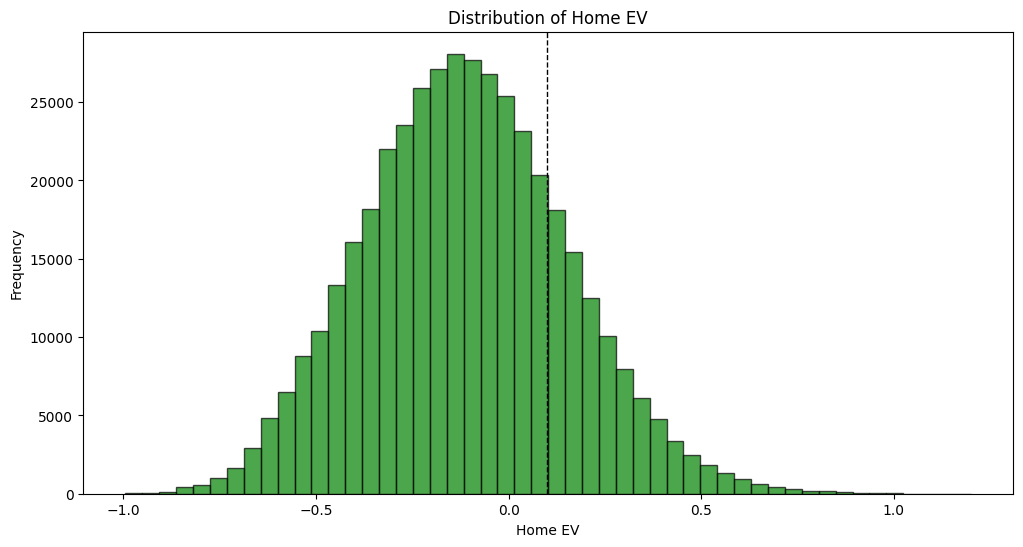

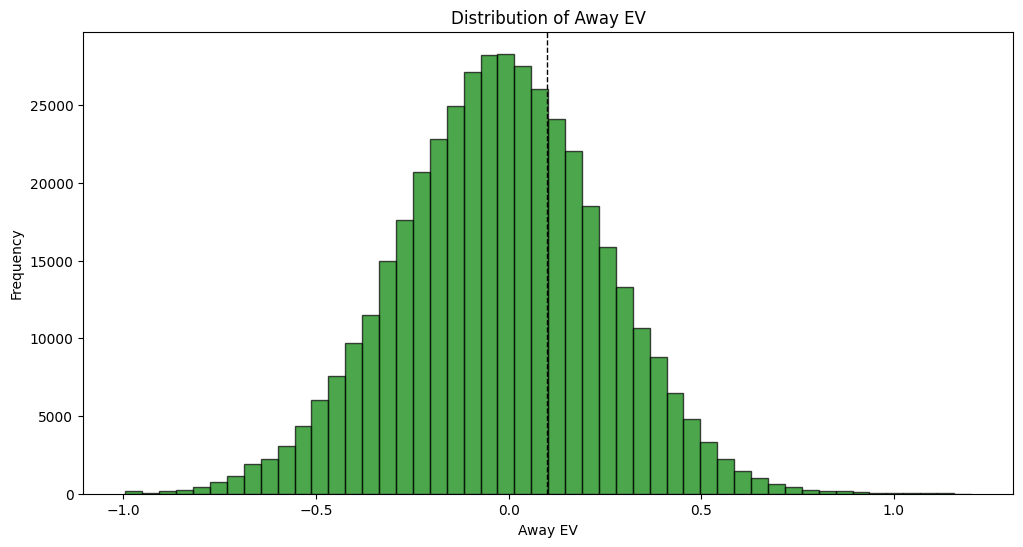

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming odds_df is your DataFrame with the EV calculations

# Function to plot EV distributions and calculate statistics
def plot_ev_distribution(odds_df):
    # Calculate statistics for Home EV
    home_ev_mean = odds_df['Home EV'].mean()
    home_ev_std = odds_df['Home EV'].std()
    away_ev_mean = odds_df['Away EV'].mean()
    away_ev_std = odds_df['Away EV'].std()

    # Print statistics
    print(f"Home EV Mean: {home_ev_mean:.4f}, Home EV Std Dev: {home_ev_std:.4f}")
    print(f"Away EV Mean: {away_ev_mean:.4f}, Away EV Std Dev: {away_ev_std:.4f}")

    # Count EV values
    home_ev_ge_0_1 = np.sum(odds_df['Home EV'] >= 0.1)
    home_ev_lt_0_1 = np.sum(odds_df['Home EV'] < 0.1)
    away_ev_ge_0_1 = np.sum(odds_df['Away EV'] >= 0.1)
    away_ev_lt_0_1 = np.sum(odds_df['Away EV'] < 0.1)

    print(f"Home EV >= 0.1: {home_ev_ge_0_1}, Home EV < 0.1: {home_ev_lt_0_1}")
    print(f"Away EV >= 0.1: {away_ev_ge_0_1}, Away EV < 0.1: {away_ev_lt_0_1}")

    # Plotting Home EV
    plt.figure(figsize=(12, 6))
    n, bins, patches = plt.hist(odds_df['Home EV'].dropna(), bins=50, color='gray', edgecolor='black', alpha=0.7)
    plt.axvline(x=0.1, color='black', linestyle='dashed', linewidth=1)
    plt.title('Distribution of Home EV')
    plt.xlabel('Home EV')
    plt.ylabel('Frequency')

    # Highlight bars where EV >= 0.1
    for i in range(len(bins) - 1):
        for patch in patches:
            if bins[i] >= 0.1:
                patch.set_facecolor('green')
            else:
                patch.set_facecolor('red')

    plt.show()

    # Plotting Away EV
    plt.figure(figsize=(12, 6))
    n, bins, patches = plt.hist(odds_df['Away EV'].dropna(), bins=50, color='gray', edgecolor='black', alpha=0.7)
    plt.axvline(x=0.1, color='black', linestyle='dashed', linewidth=1)
    plt.title('Distribution of Away EV')
    plt.xlabel('Away EV')
    plt.ylabel('Frequency')

    # Highlight bars where EV >= 0.1
    for i in range(len(bins) - 1):
        for patch in patches:
            if bins[i] >= 0.1:
                patch.set_facecolor('green')
            else:
                patch.set_facecolor('red')

    plt.show()

# Run the function
plot_ev_distribution(odds_df)


Simulating Bets: 100%|██████████| 484919/484919 [00:16<00:00, 29842.81it/s]


Total Profit: $-287789.00
Total Wagered: $8160000.00
Total Yield: -3.53%
Total Hitrate: 50.12%
Sample Size: 1632
Unique Games: 1128

Bets Details:
             Home Team              Away Team Wagered Team      EV  Odds  Final Total  Taken Total  Projected Total Outcome  Optimal H1 Total  Optimal Q4 Total  Pregame Total Current Period Current Clock Current Score Prediction Quarter   Final Score  Profit  New Bankroll
        Denver Nuggets              Utah Jazz         Over 0.18940  1.90          212        225.5            176.0    Loss             116.5             231.0          225.5            1st         11:11           2-1                 Q4 (58-45,52-57) -5000.0       95000.0
        Denver Nuggets              Utah Jazz         Over 0.15878  1.86          212        225.5            233.0    Loss             119.5             236.0          225.5            1st         08:05          14-5                 Q4 (58-45,52-57) -5000.0       90000.0
     Memphis Grizzlies       Dalla

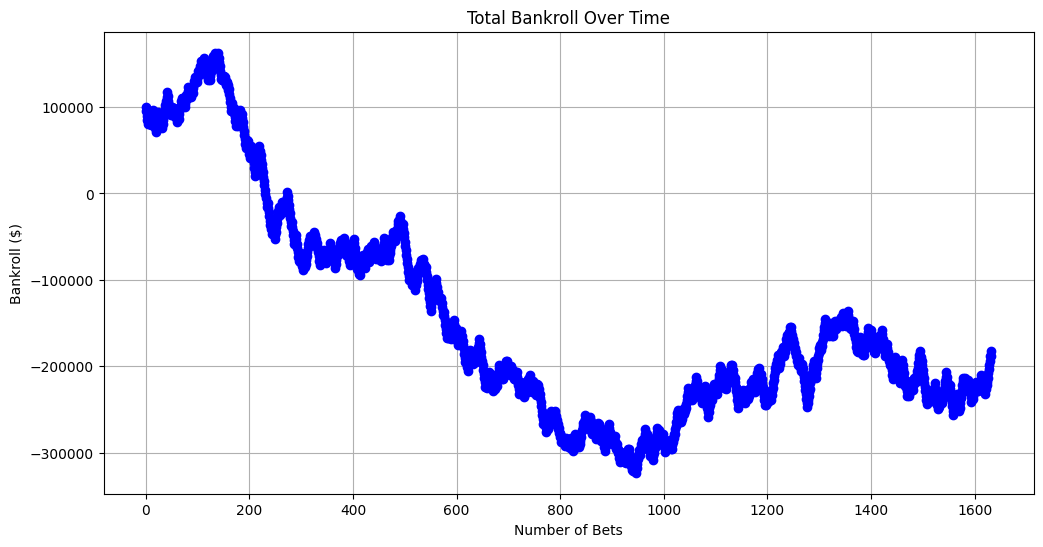

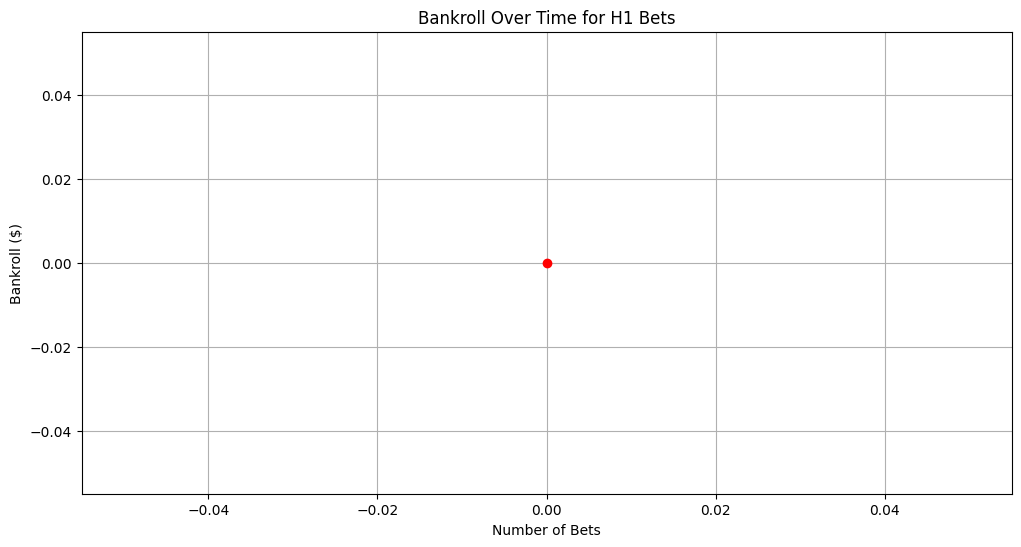

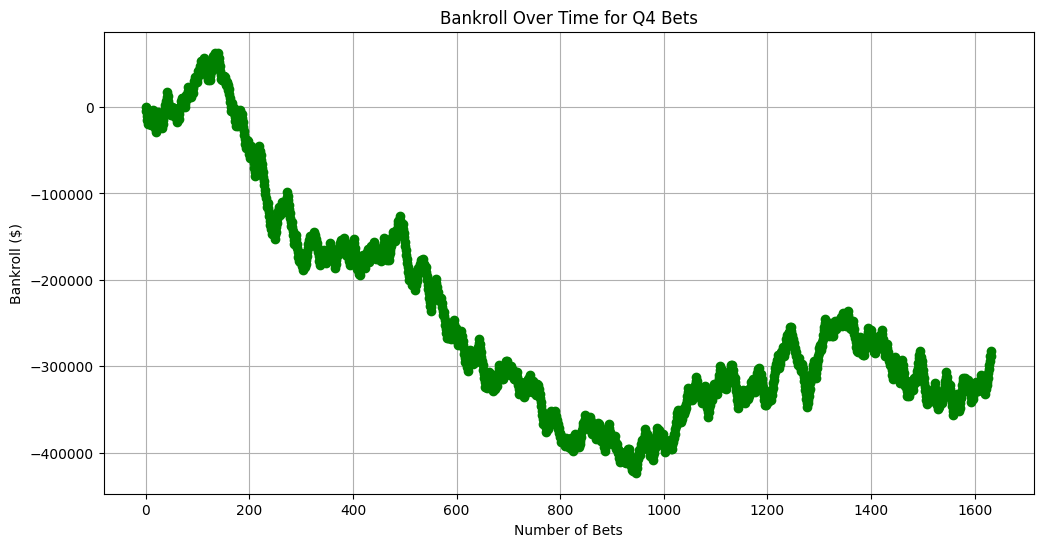

In [63]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to calculate EV
def calculate_ev(implied_winrate, model_winrate):
    return model_winrate - implied_winrate

# Define the betting simulator function
def simulate_betting(
    df: pd.DataFrame,
    min_ev: float = 0.1,
    max_ev: float = 0.3,
    bet_amount: float = 2500,
    game_max: float = 5000,
    min_samplesize: int = 0,
    initial_bankroll: float = 100000,
    cooldown: int = 180,  # Cooldown in seconds
    q2=True,
    q4=True,
    pred_total_range: tuple = (0, 300),
    pregame_total_range: tuple = (0, 300),
    curr_total_range: tuple = (0, 300),
    time_left_range: tuple = (0, 48),
    Overs=True,
    Unders=True
) -> pd.DataFrame:
    """
    Simulates a betting strategy based on expected value and other parameters.

    Parameters:
    - df: DataFrame containing game and odds information.
    - min_ev: Minimum EV to consider a bet.
    - max_ev: Maximum EV to consider a bet.
    - bet_amount: Amount to bet per game.
    - game_max: Maximum cumulative bet allowed for a single game.
    - min_timeleft: Minimum time left in minutes for considering a bet.
    - max_timeleft: Maximum time left in minutes for considering a bet.
    - min_samplesize: Minimum sample size to consider for betting.
    - initial_bankroll: Starting bankroll for the betting simulation.
    - cooldown: Cooldown time in seconds after placing a bet on the same game and type.
    - q2: Whether to consider 2nd quarter bets.
    - q4: Whether to consider 4th quarter bets.
    - handicap_range: Tuple specifying the range of handicaps to consider.
    - pregame_spread_range: Tuple specifying the range of pregame spreads to consider.
    - score_diff_range: Tuple specifying the range of score differences to consider.
    - time_left_range: Tuple specifying the range of time left in the game to consider.

    Returns:
    - DataFrame containing details of all placed bets.
    """
    bankroll = initial_bankroll
    total_wagered = 0
    total_profit = 0
    q4profit = 0
    h1profit = 0
    win = 0
    loss = 0
    bet_count = 0
    # Dictionary to track cumulative bets for each game (home_team_name, away_team_name, match_date, Type)
    cumulative_bets = {}

    # Dictionary to track the last bet time for each game and type
    last_bet_time = {}

    # DataFrame to track each wager
    bets_data = []

    # List to track bankroll over time
    bankroll_over_time = [initial_bankroll]
    bankroll_over_time_h1 = [0]
    bankroll_over_time_q4 = [0]

    # Map periods to minutes remaining
    period_map = {'1st': 36, '2nd': 24, '3rd': 12, '4th': 0}
    
    # Set any empty value in 'Sample Size' to 0
    df['Sample Size'] = df['Sample Size'].fillna(0)

    # Iterate from the bottom to the top of the DataFrame with a progress bar
    for index, row in tqdm(df.iloc[::-1].iterrows(), total=df.shape[0], desc="Simulating Bets"):

        if row['Minutes Remaining'] < time_left_range[0] or row['Minutes Remaining'] > time_left_range[1] :
            continue
        
        
        if row['Handicap'] < pred_total_range[0] or row['Handicap'] > pred_total_range[1] :
            continue
        
         # Initialize score_diff based on Type
        if row['Type'] == "total_odds_q4" and q4==True:
            total = row['home_team_score'] + row['away_team_score']
            
        
        elif row['Type'] == "total_odds_q2" and q2==True:
            total = row['H1 total']
            row['projected_score_bucket'] = row['projected_score_bucket']/2
        else:
            continue

        
        # Calculate time left in the game
        minutes_left = period_map[row['Period']] + int(row['Clock'].split(':')[0])

        # Skip if sample size constraint is not met
        if row['Sample Size'] < min_samplesize:
            continue

        # Check if score difference is within the specified range
        if not curr_total_range[0] <= total <= curr_total_range[1]:
            continue

        # Check if pregame spread is within the specified range
        if not pregame_total_range[0] <= row['Pregame Total'] <= pregame_total_range[1]:
            continue

        # Construct a unique key for the game
        game_key = (row['home_team_name'], row['away_team_name'], row['match_date'], row['Type'])

        # Initialize cumulative bet amount for the game if not already present
        if game_key not in cumulative_bets:
            cumulative_bets[game_key] = 0

        # Check cooldown for the current game and type
        if game_key in last_bet_time:
            time_since_last_bet = (last_bet_time[game_key] - row['Minutes Remaining']*60)
            if time_since_last_bet < cooldown:
                continue  # Skip if still in cooldown period

        # Bet on Home Team if EV is within the specified range
        if min_ev < row['Home EV'] < max_ev:
            price = row['Handicap']
            
            if (Overs == False):
                continue
            
            # Check if the cumulative bet for this game exceeds the maximum allowed bet
            if cumulative_bets[game_key] + bet_amount <= game_max:
                if total - price > 0:
                    # Home team wins
                    profit = bet_amount * (row['Home Odds']) * 1.02
                    outcome = 'Win'
                    win+=1
                elif total - price == 0:
                    profit = 0
                    outcome = 'Tie'
                else:
                    # Home team loses
                    profit = -bet_amount
                    outcome = 'Loss'
                    loss+=1
                
                
                # Update total profit, wagered, and bankroll
                total_profit += profit
                total_wagered += bet_amount
                bankroll += profit

                # Add bet details to bets_data
                bets_data.append({
 
                    'Home Team': row['home_team_name'],
                    'Away Team': row['away_team_name'],
                    'Wagered Team': 'Over',
                    'EV': row['Home EV'],
                    'Odds': row['Home Decimal Odds'],
                    'Final Total': total,
                    'Taken Total': price,
                    'Projected Total': row['projected_score_bucket'],
                    'Outcome': outcome,
                    'Optimal H1 Total': row['Optimal H1 Total'],
                    'Optimal Q4 Total': row['Optimal Q4 Total'],
                    'Pregame Total': row['Pregame Total'],
                    'Current Period': row['Period'],
                    'Current Clock': row['Clock'],
                    'Current Score': row['Score'],
                    'Prediction Quarter': row['Derivative Quarter'],
                    'Final Score': row['quarter_scores'],
                    'Profit': profit,
                    'New Bankroll': bankroll
                })

                # Update bankroll over time
                bankroll_over_time.append(bankroll)

                 # Update bankroll for specific quarters
                if row['Type'] == "total_odds_q4":
                    q4profit += profit
                    bankroll_over_time_q4.append(q4profit)
                elif row['Type'] == "total_odds_q2":
                    h1profit += profit
                    bankroll_over_time_h1.append(h1profit)

                # Update cumulative bet amount for the game
                cumulative_bets[game_key] += bet_amount

                # Update the last bet time for the game
                last_bet_time[game_key] = row['Minutes Remaining'] * 60

                bet_count += 1

        # Bet on Away Team if EV is within the specified range
        if min_ev < row['Away EV'] < max_ev:
            if (Unders == False):
                continue
            price = row['Handicap']


            # Check if the cumulative bet for this game exceeds the maximum allowed bet
            if cumulative_bets[game_key] + bet_amount <= game_max:
                if total - price < 0:
                    # Away team wins
                    profit = bet_amount * (row['Away Odds']) * 1.02
                    outcome = 'Win'
                    win+=1
                elif total - price == 0:
                    profit = 0
                    outcome = 'Tie'
                else:
                    # Away team loses
                    profit = -bet_amount
                    outcome = 'Loss'
                    loss+=1
                
                #print(score_diff)  
                #print(handicap)
                #print(outcome)
                #print(score_diff+handicap)
                #print("")
                
                # Update total profit, wagered, and bankroll
                total_profit += profit
                total_wagered += bet_amount
                bankroll += profit
                
                # Add bet details to bets_data
                bets_data.append({

                    'Home Team': row['home_team_name'],
                    'Away Team': row['away_team_name'],
                    'Wagered Team': 'Under',
                    'EV': row['Away EV'],
                    'Odds': row['Away Decimal Odds'],
                    'Final Total': total,
                    'Taken Total': price,
                    'Projected Total': row['projected_score_bucket'],
                    'Outcome': outcome,
                    'Optimal H1 Total': row['Optimal H1 Total'],
                    'Optimal Q4 Total': row['Optimal Q4 Total'],
                    'Pregame Total': row['Pregame Total'],
                    'Current Period': row['Period'],
                    'Current Clock': row['Clock'],
                    'Current Score': row['Score'],
                    'Prediction Quarter': row['Derivative Quarter'],
                    'Final Score': row['quarter_scores'],
                    'Profit': profit,
                    'New Bankroll': bankroll
                })

                # Update bankroll over time
                bankroll_over_time.append(bankroll)

                # Update bankroll for specific quarters
                if row['Type'] == "total_odds_q4":
                    q4profit += profit
                    bankroll_over_time_q4.append(q4profit)
                elif row['Type'] == "total_odds_q2":
                    h1profit += profit
                    bankroll_over_time_h1.append(h1profit)

                # Update cumulative bet amount for the game
                cumulative_bets[game_key] += bet_amount

                # Update the last bet time for the game
                last_bet_time[game_key] = row["Minutes Remaining"]

                bet_count += 1

    # Calculate ROI
    total_roi = (total_profit / total_wagered) * 100 if total_wagered != 0 else 0

    # Display Results
    print(f"Total Profit: ${total_profit:.2f}")
    print(f"Total Wagered: ${total_wagered:.2f}")
    print(f"Total Yield: {total_roi:.2f}%")
    print(f"Total Hitrate: {100*win/(win+loss):.2f}%")
    print(f"Sample Size: {bet_count}")
    print(f"Unique Games: {odds_df[['home_team_name', 'away_team_name', 'match_date']].drop_duplicates().shape[0]}")
    
    # Create a DataFrame for the bets
    bets_df = pd.DataFrame(bets_data)

    # Display the bets DataFrame
    print("\nBets Details:")
    print(bets_df.to_string(index=False))

    # Plot Bankroll Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(bankroll_over_time, marker='o', linestyle='-', color='b')
    plt.title('Total Bankroll Over Time')
    plt.xlabel('Number of Bets')
    plt.ylabel('Bankroll ($)')
    plt.grid(True)
    plt.show()

    # Plot Bankroll for H1
    plt.figure(figsize=(12, 6))
    plt.plot(bankroll_over_time_h1, marker='o', linestyle='-', color='r')
    plt.title('Bankroll Over Time for H1 Bets')
    plt.xlabel('Number of Bets')
    plt.ylabel('Bankroll ($)')
    plt.grid(True)
    plt.show()

    # Plot Bankroll for Q4
    plt.figure(figsize=(12, 6))
    plt.plot(bankroll_over_time_q4, marker='o', linestyle='-', color='g')
    plt.title('Bankroll Over Time for Q4 Bets')
    plt.xlabel('Number of Bets')
    plt.ylabel('Bankroll ($)')
    plt.grid(True)
    plt.show()

    return bets_df

# Run the betting simulation
bets_df = simulate_betting(
    df=odds_df,
    min_ev=0.15,
    max_ev=0.5,
    bet_amount=5000,
    game_max=10000,
    min_samplesize=10,
    initial_bankroll=100000,
    cooldown=90,
    q4=True,
    q2=False,
    pred_total_range = (0, 300),
    pregame_total_range = (0, 300),
    curr_total_range = (0, 300),
    time_left_range = (0, 48),
    Overs=True,
    Unders=True
)
